## Imports


In [1]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [3]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=439&path=housing.csv', sep=',')
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


### Seleccionamos las columnas indicadas en el ejercicio 

In [4]:
df = df[["Latitude", "Longitude", "MedInc"]]
df.head(15)
print(df.shape)

(20640, 3)


### Grafico de datos 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

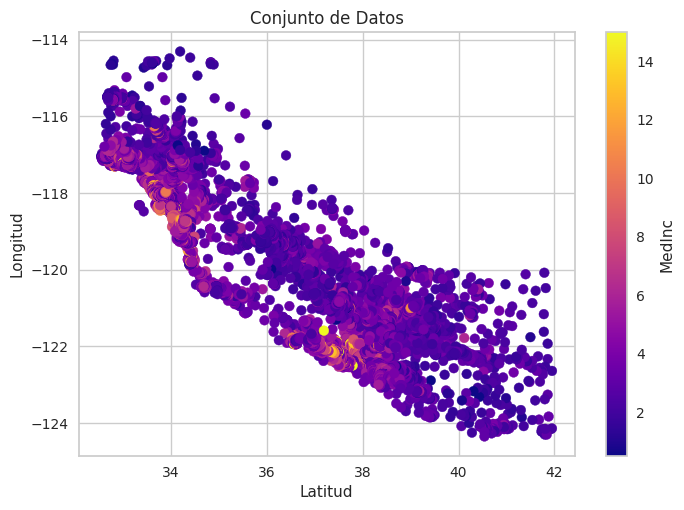

In [5]:
plt.scatter(df['Latitude'], df['Longitude'], c=df['MedInc'], cmap='plasma')
plt.title('Conjunto de Datos')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.colorbar(label='MedInc')
plt.show()

## Split

In [6]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state= 42)
X_train.shape

(16512, 3)

### Entrenamiento del modelo 

#### Vamos a realizar dos modelos ,para poder comparar la relevancia de los parametros 

In [7]:
# K-Means Clustering Auto
kmeans = KMeans(n_clusters=6, random_state=42, max_iter=600)
kmeans.fit(X_train)
X_train['cluster'] = kmeans.labels_

# K-Means Clustering Advanced
kmeans_adv = KMeans(n_clusters=3, random_state=42, n_init='auto', max_iter=300)
kmeans_adv.fit(X_train)

X_train['cluster_adv'] = kmeans_adv.labels_
X_train.head(20)


,Latitude,Longitude,MedInc,cluster,cluster_adv
14196,32.71,-117.03,3.2596,3,1
8267,33.77,-118.16,3.8125,1,1
17445,34.66,-120.48,4.1563,1,1
14265,32.69,-117.11,1.9425,3,1
2271,36.78,-119.80,3.5542,5,0
17848,37.42,-121.86,6.6227,0,2
6252,34.04,-117.97,2.5192,3,1
9389,37.91,-122.53,7.9892,0,2
6113,34.13,-117.90,1.5000,3,1
6061,34.02,-117.79,6.4266,2,1


### Escalamos los datos , tambien para ver resultados 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

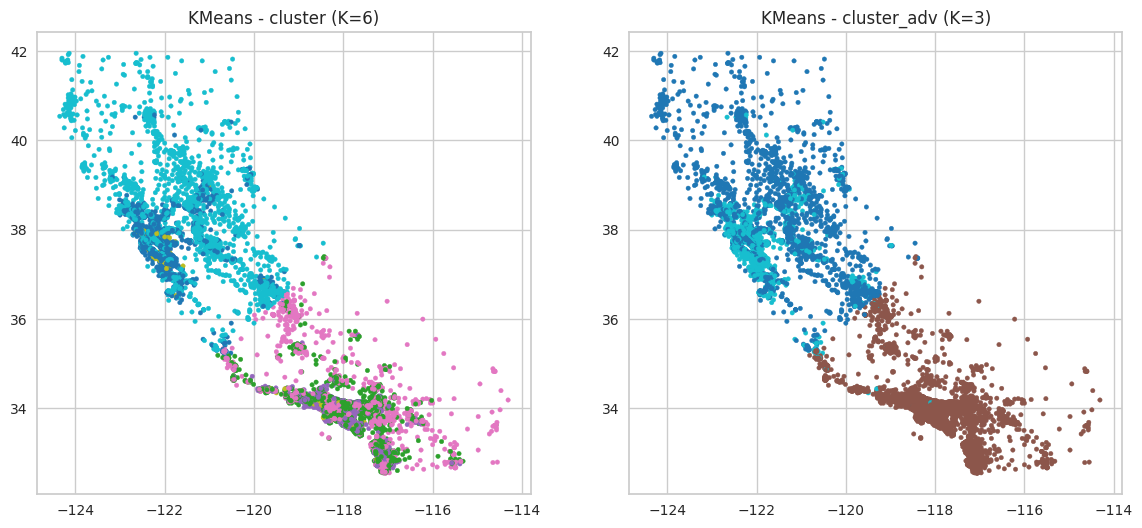

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(
    X_train['Longitude'],
    X_train['Latitude'],
    c=X_train['cluster'],
    cmap='tab10',
    s=10
)
axes[0].set_title("KMeans - cluster (K=6)")

axes[1].scatter(
    X_train['Longitude'],
    X_train['Latitude'],
    c=X_train['cluster_adv'],
    cmap='tab10',
    s=10
)
axes[1].set_title("KMeans - cluster_adv (K=3)")

plt.show()

#### Se puede ver que al tener 6 clusters y aumentando significativamente de maximo de iteraciones no hace que sea mas claro o mas separaddas las clasificaciones de clusters. 
#### K=3, se pueden diferenciar en el grafico los dos clusters "principales" bien marcados,azul marino y el marron 
#### K=6, se observan 4 colores obvios,dos azules en la parte superir el rosa,y rosa y verde en la parte inferior . los otros dos ,amarillo y morado apenas son perceptibles.

### Test 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

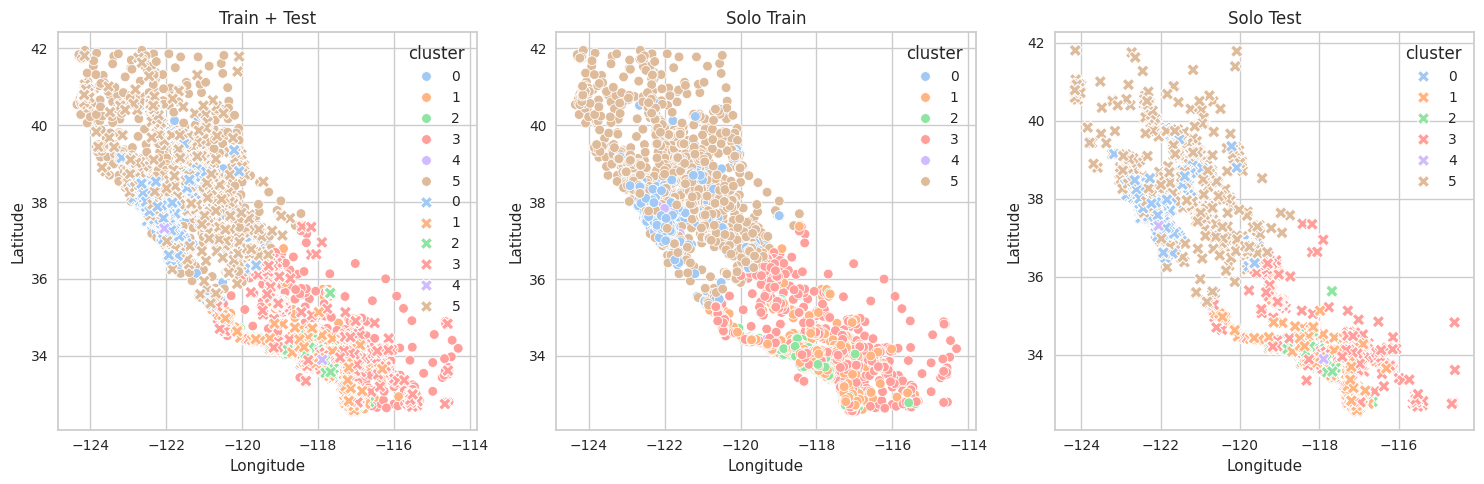

In [9]:
X_test['cluster'] = kmeans.predict(X_test)

fig, axis = plt.subplots(1, 3, figsize = (15, 5)) 

sns.scatterplot(ax = axis [0], data=X_train, x='Longitude', y='Latitude', hue='cluster', palette='pastel') 
sns.scatterplot(ax = axis [0], data=X_test, x='Longitude', y='Latitude', hue='cluster', palette='pastel', marker='X', s= 80) 
axis[0].set_title("Train + Test")

sns.scatterplot(ax = axis [1], data=X_train, x='Longitude', y='Latitude', hue='cluster', palette='pastel') 
axis[1].set_title("Solo Train")


sns.scatterplot(ax = axis [2], data=X_test, x='Longitude', y='Latitude', hue='cluster', palette='pastel', marker='X', s = 80)
axis[2].set_title("Solo Test")

plt.tight_layout()
plt.show()

### Train con modelo supervisado

In [10]:
X_train

,Latitude,Longitude,MedInc,cluster,cluster_adv
14196,32.71,-117.03,3.2596,3,1
8267,33.77,-118.16,3.8125,1,1
17445,34.66,-120.48,4.1563,1,1
14265,32.69,-117.11,1.9425,3,1
2271,36.78,-119.80,3.5542,5,0
...,...,...,...,...,...
11284,33.78,-117.96,6.3700,2,1
11964,34.02,-117.43,3.0500,3,1
5390,34.03,-118.38,2.9344,3,1
860,37.58,-121.96,5.7192,0,2


In [11]:
# Split train and test
X = X_train.drop(["cluster", "cluster_adv"], axis=1)
y = X_train["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### escalamos los datos

In [16]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [17]:
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       477
           1       0.99      1.00      1.00       783
           2       0.99      0.99      0.99       258
           3       1.00      1.00      1.00       877
           4       1.00      0.90      0.95        61
           5       1.00      0.99      0.99       847

    accuracy                           0.99      3303
   macro avg       0.99      0.98      0.99      3303
weighted avg       0.99      0.99      0.99      3303



In [19]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       477
           1       0.98      0.99      0.98       783
           2       0.98      0.98      0.98       258
           3       0.98      0.99      0.99       877
           4       1.00      0.93      0.97        61
           5       0.99      0.99      0.99       847

    accuracy                           0.99      3303
   macro avg       0.99      0.98      0.98      3303
weighted avg       0.99      0.99      0.99      3303



### Hemos realizado el entrenamiento con dos modelos de classificacion, y ambos dan predicciones casi del 100%.Acercandose mas veces a dicho numero RandomForest , con los datos escalados con MinmaxScaler . Ambos tienen un accuracy del 99%. 

### Guardamos modelos

In [21]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(randomforest, "rf_model.pkl")
joblib.dump(knn, "knn_model.pkl")
print("Models saved successfully.")

Models saved successfully.
